In [32]:
pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: Faker in c:\users\arfam\appdata\local\programs\python\python312\lib\site-packages (33.1.0)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import classification_report, confusion_matrix
# Load the datasets
df = pd.read_csv("C:/Users/arfam/Downloads/final_dataset.csv", encoding="latin1")
ip = pd.read_csv("geoip2-ipv4_csv.csv")

# Display the first few rows of the dataset
print(df.head())

                                                 url  \
0  https://www.amazon.co.uk/gp/review/R18JE8EYCYX...   
1  https://www.amazon.co.uk/gp/review/R3M2146VNTD...   
2  https://www.amazon.co.uk/gp/review/R3U00QINFHP...   
3  https://www.amazon.co.uk/gp/review/R5BZDAV3JC42E/   
4  https://www.amazon.co.uk/gp/review/R1AS6K8FBV8...   

                                         review_bold  ratings  \
0                            I rarely use them but..        5   
1  Best Price for Great Workout / Running Headphones        5   
2      Amazed at how good these sound for the price.        5   
3  Earbuds that give you great sound for a small ...        5   
4                                        Great price        5   

                                              review  verified           date  \
0  These headphones are pretty damn good for the ...         0  25 April 2017   
1  These are amazing for £10. AMAZING. They stick...         0     3 May 2017   
2  They fit very comfortably 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [5]:
#lOADING DATASET 
df = pd.read_csv("C:/Users/arfam/Downloads/final_dataset.csv",encoding="latin1") #due to special charas should be encoded as latin 1
#REMOVE MAX
ip=pd.read_csv("geoip2-ipv4_csv.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
n_reviews, n_attributes = df.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)

Total Reviews:  7652
Total Attributes:  14


In [7]:
ip.describe()

,geoname_id
count,1.715610e+05
mean,3.498003e+06
std,2.002172e+06
min,4.951800e+04
25%,2.017370e+06
50%,2.921044e+06
75%,6.252001e+06
max,7.909807e+06


In [8]:
ip.head()

,network,geoname_id,continent_code,continent_name,country_iso_code,country_name,is_anonymous_proxy,is_satellite_provider
0,41.74.160.0/20,49518.0,AF,Africa,RW,Rwanda,False,False
1,41.77.160.0/22,49518.0,AF,Africa,RW,Rwanda,False,False
2,41.138.80.0/21,49518.0,AF,Africa,RW,Rwanda,False,False
3,41.186.0.0/16,49518.0,AF,Africa,RW,Rwanda,False,False
4,41.197.0.0/16,49518.0,AF,Africa,RW,Rwanda,False,False


In [9]:
ip.describe(include=object)

,network,continent_code,continent_name,country_iso_code,country_name
count,172754,120141,171561,171513,171561
unique,172754,6,7,248,249
top,41.74.160.0/20,EU,Europe,US,United States
freq,1,80227,80227,39322,39322


In [10]:
ip.isnull().sum()



network                      0
geoname_id                1193
continent_code           52613
continent_name            1193
country_iso_code          1241
country_name              1193
is_anonymous_proxy           0
is_satellite_provider        0
dtype: int64

In [11]:
dup = ip.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  0


In [12]:
import ipaddress

def validate_ip_address(ip_string):
    try:
        ip_object = ipaddress.ip_address(ip_string)
        print(f"The IP address '{ip_object}' is valid.")
    except ValueError:
        print(f"The IP address '{ip_string}' is not valid.")

In [13]:
validate_ip_address("127.0.0.1")
validate_ip_address("256.256.256.256")  

The IP address '127.0.0.1' is valid.
The IP address '256.256.256.256' is not valid.


In [14]:
import requests

try:
    public_ip = requests.get('https://api.ipify.org').text
    print(f"Public IP Address: {public_ip}")
except requests.RequestException as e:
    print(f"Error retrieving public IP address: {e}")

Public IP Address: 152.58.243.42


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               7652 non-null   object 
 1   review_bold       7652 non-null   object 
 2   ratings           7652 non-null   int64  
 3   review            7652 non-null   object 
 4   verified          7652 non-null   int64  
 5   date              7652 non-null   object 
 6   by                7652 non-null   object 
 7   profile_id        7652 non-null   object 
 8   most_rev          7652 non-null   int64  
 9   by_link           7652 non-null   object 
 10  helpful           7652 non-null   int64  
 11  product           7335 non-null   object 
 12  product_link      7652 non-null   object 
 13  review_sentiment  7652 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 837.1+ KB


In [16]:
df.head()

,url,review_bold,ratings,review,verified,date,by,profile_id,most_rev,by_link,helpful,product,product_link,review_sentiment
0,https://www.amazon.co.uk/gp/review/R18JE8EYCYX...,I rarely use them but..,5,These headphones are pretty damn good for the ...,0,25 April 2017,Sandra Morgan,AFNMUCU4D7HN6NLUSQXPYSS7ZT6A,1,https://www.amazon.co.uk/gp/profile/amzn1.acco...,39,Earphones In ear Black&Red,https://www.amazon.co.uk/Earphones-In-ear-Blac...,0.223021
1,https://www.amazon.co.uk/gp/review/R3M2146VNTD...,Best Price for Great Workout / Running Headphones,5,These are amazing for £10. AMAZING. They stick...,0,3 May 2017,Ryan Gibson,AEMS5UDZTZN4L3BIJV57COUNV2FA,1,https://www.amazon.co.uk/gp/profile/amzn1.acco...,0,Earphones In ear Black&Blue,https://www.amazon.co.uk/Earphones-In-ear-Blac...,0.402500
2,https://www.amazon.co.uk/gp/review/R3U00QINFHP...,Amazed at how good these sound for the price.,5,They fit very comfortably in my ear and have p...,0,28 April 2017,Ryan Gibson,AEMS5UDZTZN4L3BIJV57COUNV2FA,1,https://www.amazon.co.uk/gp/profile/amzn1.acco...,0,Headphones with Earhook Design Black,https://www.amazon.co.uk/Headphones-with-Earho...,0.246667
3,https://www.amazon.co.uk/gp/review/R5BZDAV3JC42E/,Earbuds that give you great sound for a small ...,5,These earbuds will change the way you look at ...,0,25 April 2017,Ryan Gibson,AEMS5UDZTZN4L3BIJV57COUNV2FA,1,https://www.amazon.co.uk/gp/profile/amzn1.acco...,35,In Ear Earphones Black,https://www.amazon.co.uk/XuDirect-In-Ear-Earph...,0.288550
4,https://www.amazon.co.uk/gp/review/R1AS6K8FBV8...,Great price,5,These headphones are a great value for this pr...,0,25 March 2017,Ryan Gibson,AEMS5UDZTZN4L3BIJV57COUNV2FA,1,https://www.amazon.co.uk/gp/profile/amzn1.acco...,0,Headphones OCOMI In-line Control Earbuds Wired...,https://www.amazon.co.uk/Headphones-OCOMI-Cont...,0.446364


In [17]:
df.describe()

,ratings,verified,most_rev,helpful,review_sentiment
count,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000
mean,4.345923,0.724255,10.311945,1.000000,0.295181
std,1.112854,0.446918,9.676457,4.214358,0.273503
min,1.000000,0.000000,1.000000,0.000000,-1.000000
25%,4.000000,0.000000,4.000000,0.000000,0.125000
50%,5.000000,1.000000,8.000000,0.000000,0.255744
75%,5.000000,1.000000,14.000000,0.000000,0.455000
max,5.000000,1.000000,48.000000,87.000000,1.000000


In [18]:
#OBJECTS
df.describe(include=object)

,url,review_bold,review,date,by,profile_id,by_link,product,product_link
count,7652,7652,7652,7652,7652,7652,7652,7335,7652
unique,7411,5433,7001,1240,629,657,658,6016,6029
top,https://www.amazon.co.uk/gp/review/R2G8KFR5R1S...,Five Stars,Good buy will shop again,25 April 2017,Amazon Customer,AEF45VY5VBO7YNBGXP4E2N4OCHPA,https://www.amazon.co.uk/gp/profile/amzn1.acco...,Earphones In ear Black&Red,0
freq,2,875,33,157,522,150,150,115,317


In [19]:
df.isnull().sum()


url                   0
review_bold           0
ratings               0
review                0
verified              0
date                  0
by                    0
profile_id            0
most_rev              0
by_link               0
helpful               0
product             317
product_link          0
review_sentiment      0
dtype: int64

In [20]:
#DISPLAYS THE NUMBER OF DUPLICATED VALUES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  241


In [21]:
#SETTING SEABORN STYLE
sns.set_style('darkgrid')

In [22]:
dup = ip.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  0


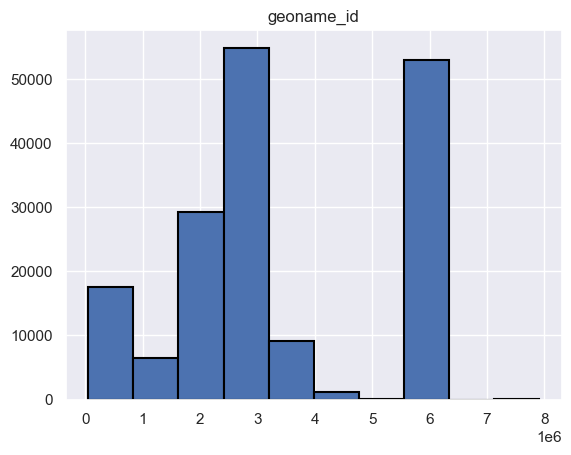

In [23]:
ip.hist(edgecolor='black', linewidth=1.5)
fig=plt.gcf()
plt.show()

In [24]:
import networkx as nx

G = nx.Graph()
# Add nodes and edges based on your dataset
G.add_node('192.168.1.1')
G.add_node('192.168.1.2')
G.add_edge('192.168.1.1', '192.168.1.2')

In [25]:
# Example of adding features
G.nodes['192.168.1.1']['feature'] = {'traffic_volume': 1000, 'malicious_count': 5}

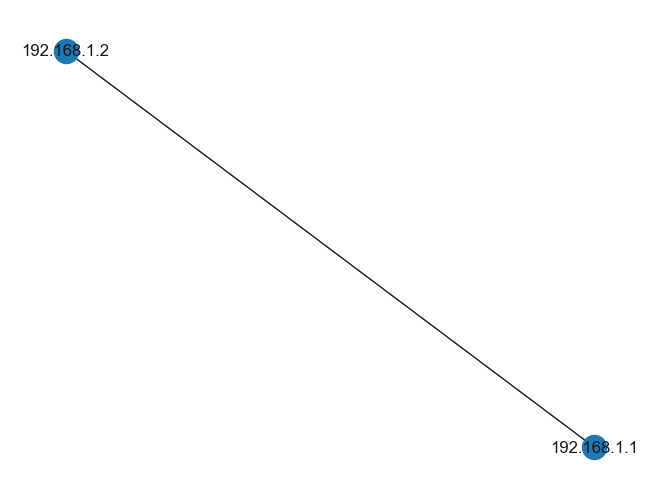

In [26]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

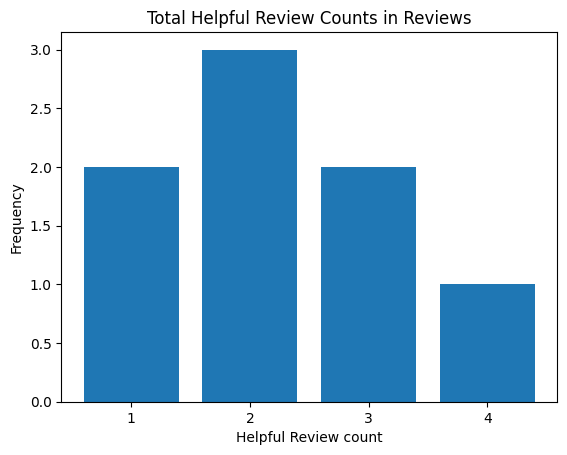

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'helpful_review_count': [1, 2, 2, 3, 1, 4, 3, 2]
}
df = pd.DataFrame(data)
# Count the occurrences of each value in 'helpful_review_count'
counts = df['helpful_review_count'].value_counts()
# Create a bar plot
plt.bar(counts.index, counts.values)
plt.title("Total Helpful Review Counts in Reviews")
plt.xlabel("Helpful Review count")
plt.ylabel("Frequency")
plt.xticks(counts.index)  # Optional: Set x-ticks to match counts
plt.show()

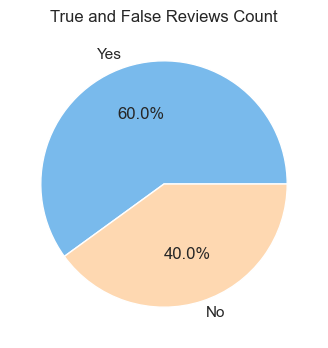

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'verified_purchase': ['Yes', 'No', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(data)
# Define colors for the pie chart
colors = ['#79BAEC', '#FED8B1']
# Create a figure for the pie chart
plt.figure(figsize=(4, 4))
# Count occurrences of each value in 'verified_purchase'
label = df['verified_purchase'].value_counts()
# Create a pie chart
plt.pie(label.values, colors=colors, labels=label.index, autopct='%1.1f%%')
plt.title("True and False Reviews Count")
plt.show()

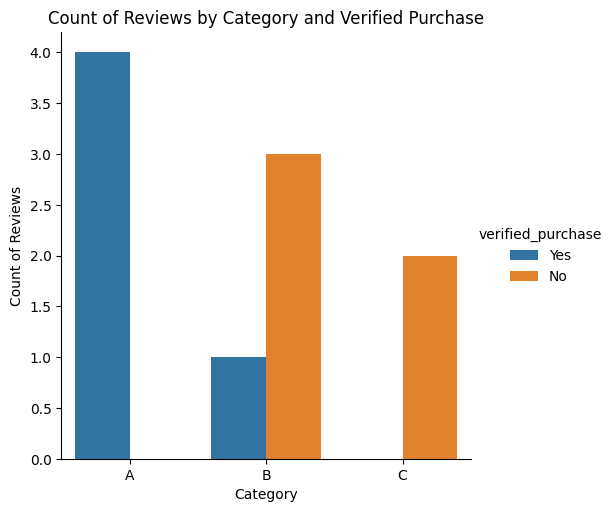

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'category': ['A', 'B', 'A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],
    'verified_purchase': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Count plot of categories grouped by verified purchase
sns.catplot(x='category', kind='count', hue='verified_purchase', data=df)
plt.xlabel("Category")
plt.ylabel("Count of Reviews")
plt.title("Count of Reviews by Category and Verified Purchase")
plt.show()

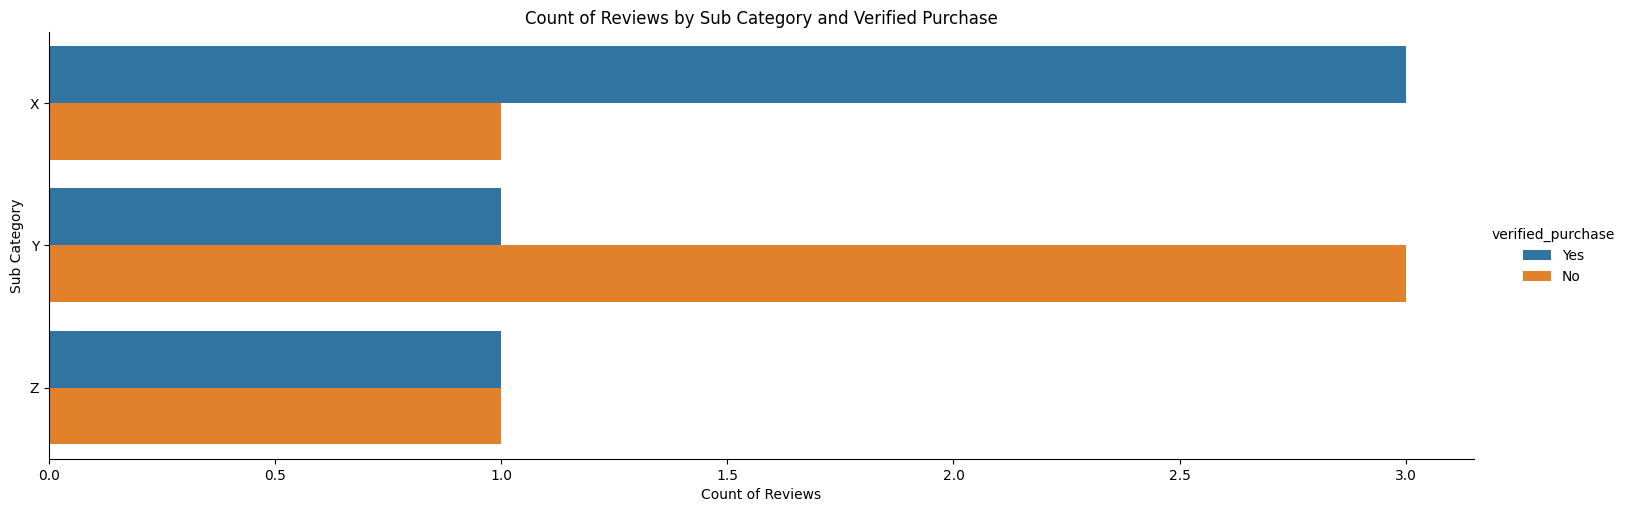

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'sub_category': ['X', 'Y', 'X', 'Z', 'Y', 'X', 'Z', 'Y', 'X', 'Y'],
    'verified_purchase': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Count plot of sub_categories grouped by verified purchase
sns.catplot(y='sub_category', kind='count', hue='verified_purchase', data=df, height=5, aspect=3)
plt.ylabel("Sub Category")
plt.xlabel("Count of Reviews")
plt.title("Count of Reviews by Sub Category and Verified Purchase")
plt.show()

In [14]:
import pandas as pd
# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'verified_purchase': [True, False, True, True, False],
    'review_text': ['Great product!', 'Not worth it.', 'Loved it!', 'Okay.', 'Terrible.']
}
df = pd.DataFrame(data)
# Creating a subset of the DataFrame
cols = ["verified_purchase", "review_text"]
vprt = df[cols]  # Making a subset of the DataFrame
# Filtering based on True and False verified purchase
checkTrue = vprt["verified_purchase"] == True
checkFalse = vprt["verified_purchase"] == False
# Display the subsets
print("Subset with verified purchases:")
print(vprt[checkTrue])
print("\nSubset without verified purchases:")
print(vprt[checkFalse])

Subset with verified purchases:
   verified_purchase     review_text
0               True  Great product!
2               True       Loved it!
3               True           Okay.

Subset without verified purchases:
   verified_purchase    review_text
1              False  Not worth it.
4              False      Terrible.


USING XGBoost 

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv("C:/Users/arfam/Downloads/final_dataset.csv", encoding='ISO-8859-1')

# Define features and labels (replace 'review_text' and 'is_fake' with actual column names)
X = df['review']  # Text of the reviews
y = df['verified']      # Target variable indicating if the review is fake (1) or real (0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Store results in a dictionary for further use if needed
results = {
    "accuracy": accuracy,
    "classification_report": classification_report_result,
    "confusion_matrix": confusion_matrix_result
}

C:\Users\arfam\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:48:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


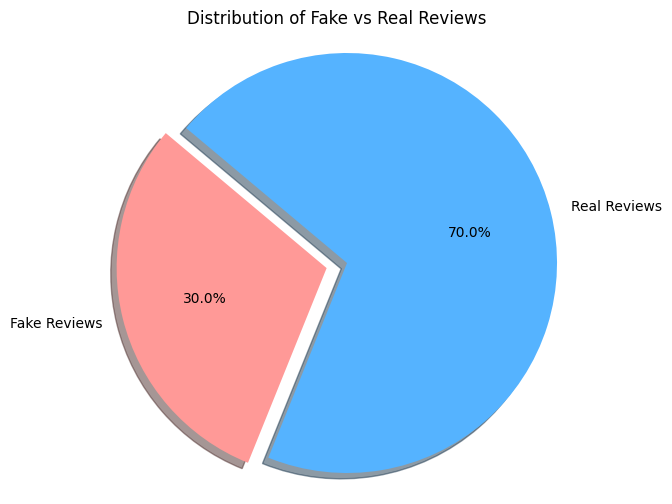

In [16]:
import matplotlib.pyplot as plt

# Sample data for the pie chart
labels = ['Fake Reviews', 'Real Reviews']
sizes = [30, 70]  # Example proportions (e.g., 30% fake, 70% real)
colors = ['#ff9997','#55b3ff']  # Colors for each slice
explode = (0.1, 0)  # Explode the first slice (Fake Reviews)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.title('Distribution of Fake vs Real Reviews')
plt.show()